# Pyber - Data Analysis

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read city data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read ride data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Merge two dataframes 
ride_city = pd.merge(ride_data, city_data, on="city")
ride_city["Type Name"] = ride_city["type"]
ride_city.head()

,city,date,fare,ride_id,driver_count,type,Type Name
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Create Dataframes for each type (Rural, Suburban, & Urban):
rural_df = ride_city.loc[ride_city["type"]=="Rural"]

sub_df = ride_city.loc[ride_city["type"]=="Suburban"]

urban_df = ride_city.loc[ride_city["type"]=="Urban"]

In [6]:
# Group each type by city:
rural_city = rural_df.groupby("city")

sub_city = sub_df.groupby("city")

urban_city = urban_df.groupby("city")

In [7]:
# Gain average fare per city for each type:
rural_avg_fare = rural_city["fare"].mean()
rural_avg_fare.mean()

34.63776503126503

In [8]:
sub_avg_fare = sub_city["fare"].mean()
sub_avg_fare.mean()

30.737298033475952

In [9]:
urban_avg_fare = urban_city["fare"].mean()
urban_avg_fare.mean()

24.499121716787847

In [10]:
# Gain total rides per city for each type:
rural_total_rides = rural_city["fare"].count()

sub_total_rides = sub_city["fare"].count()

urban_total_rides = urban_city["fare"].count()

In [11]:
# Gain driver count per city for each type:
rural_driver_count = rural_city["driver_count"].mean()

sub_driver_count = sub_city["driver_count"].mean()

urban_driver_count = urban_city["driver_count"].mean()

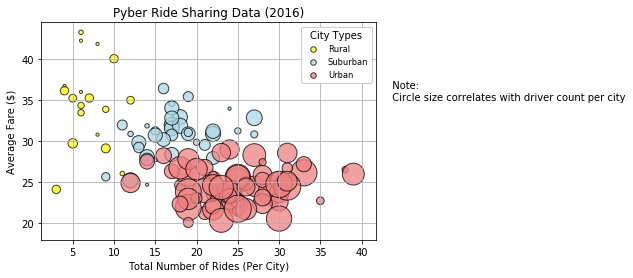

In [12]:
Rural = plt.scatter(rural_total_rides, rural_avg_fare, s=rural_driver_count*10, marker = "o", alpha = 0.75, c= "yellow", edgecolors = "black", label = "Rural", linewidths = 1)
Suburban = plt.scatter(sub_total_rides, sub_avg_fare, s=sub_driver_count*10, marker = "o", alpha = 0.75, c= "lightblue", edgecolors = "black", label = "Suburban", linewidths = 1)
Urban = plt.scatter(urban_total_rides, urban_avg_fare, s=urban_driver_count*10, marker = "o", alpha = 0.75, c= "lightcoral", edgecolors = "black", label = "Urban", linewidths = 1)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Legend:
legend = plt.legend(handles=[Rural, Suburban, Urban], loc = "best", fontsize = "small", title = "City Types", fancybox=True, framealpha=1)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Label informing of circle size:
plt.text(43, 35, '  Note: \n  Circle size correlates with driver count per city')

# Save figure
plt.savefig("Images/PyberData.png")

# Show Scatter Plot
plt.show()

## Total Fares by City Type

In [13]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

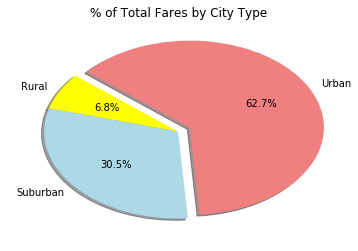

In [14]:
city_fare = ride_city.groupby(["type"]).sum()["fare"]

labels = ["Rural", "Suburban", "Urban"]
sizes = city_fare
explode = (0,0,0.1)
colors = ["yellow", "lightblue", "lightcoral"]
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140, colors = colors)
plt.title("% of Total Fares by City Type")

# Save figure
plt.savefig("Images/TotalFares.png")

plt.show()

## Total Rides by City Type

In [15]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

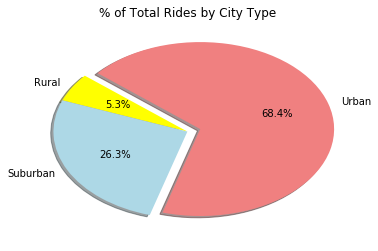

In [16]:
city_rides = ride_city.groupby(["type"]).count()["fare"]

labels = ["Rural", "Suburban", "Urban"]
sizes = city_rides
explode = (0,0,0.1)
colors = ["yellow", "lightblue", "lightcoral"]
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140, colors = colors)
plt.title("% of Total Rides by City Type")

# Save figure
plt.savefig("Images/TotalRides.png")

plt.show()

## Total Drivers by City Type

In [17]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

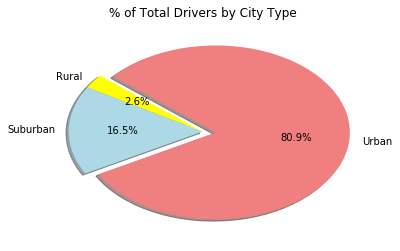

In [18]:
# Need to first drop duplicates:
clean_df = ride_city.drop_duplicates(subset=["city"])

city_drivers = clean_df.groupby(["type"]).sum()["driver_count"]

labels = ["Rural", "Suburban", "Urban"]
sizes = city_drivers
explode = (0,0,0.1)
colors = ["yellow", "lightblue", "lightcoral"]
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140, colors=colors)
plt.title("% of Total Drivers by City Type")

# Save figure
plt.savefig("Images/TotalDrivers.png")

plt.show()